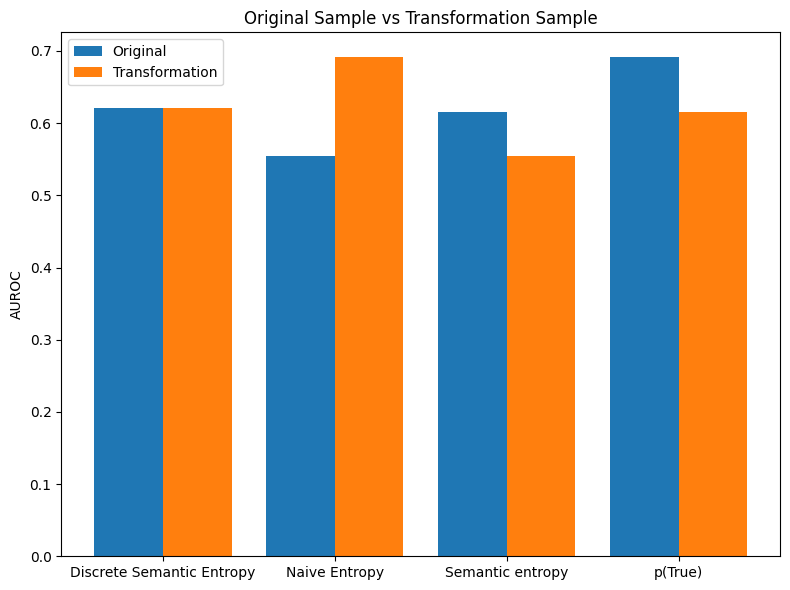

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 加载数据
transformation_df = pd.read_csv('130_10_True.csv')
original_df = pd.read_csv('130_10_False.csv')

# 聚合均值
transformation_avg = transformation_df.groupby('method')['means'].mean()
original_avg = original_df.groupby('method')['means'].mean()

# 绘制条形图
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(transformation_avg))

# 交换顺序：先绘制 Original 再绘制 Transformation
ax.bar([i for i in x], original_avg, width=0.4, label='Original', align='center')
ax.bar([i + 0.4 for i in x], transformation_avg, width=0.4, label='Transformation', align='center')

# 添加标签
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(original_avg.index, rotation=0)
ax.set_ylabel('AUROC')
ax.set_title('Original Sample vs Transformation Sample')
ax.legend()

plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (4,).

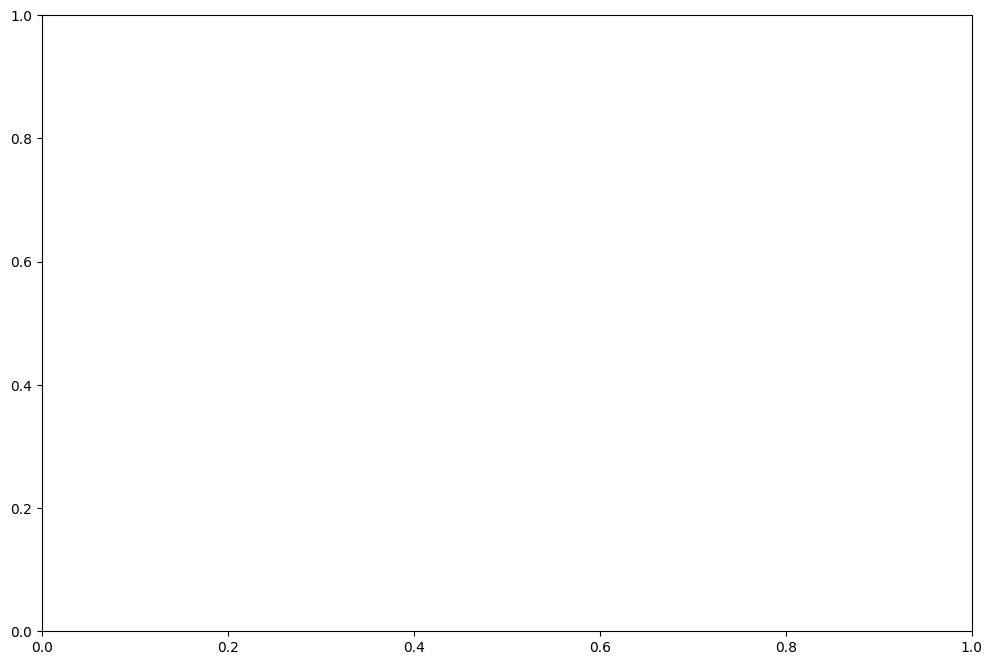

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
original_data = pd.read_csv('130_10_False.csv')
transformation_data = pd.read_csv('130_10_True.csv')

# 合并两组数据
original_data['group'] = 'Original'
transformation_data['group'] = 'Transformation'
combined_data = pd.concat([original_data, transformation_data])

# 绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
methods = combined_data['method'].unique()
metrics = combined_data['metric'].unique()

for metric in metrics:
    metric_data = combined_data[combined_data['metric'] == metric]
    x = range(len(methods))  # 每个方法的 x 位置
    width = 0.4
    original_means = metric_data[metric_data['group'] == 'Original']['means']
    transformation_means = metric_data[metric_data['group'] == 'Transformation']['means']

    ax.bar([pos - width / 2 for pos in x], original_means, width, label=f'{metric} (Original)')
    ax.bar([pos + width / 2 for pos in x], transformation_means, width, label=f'{metric} (Transformation)')

# 设置图例和标签
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods, rotation=45)
ax.set_title('Comparison of Methods Across Metrics')
ax.set_ylabel('Mean Value')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

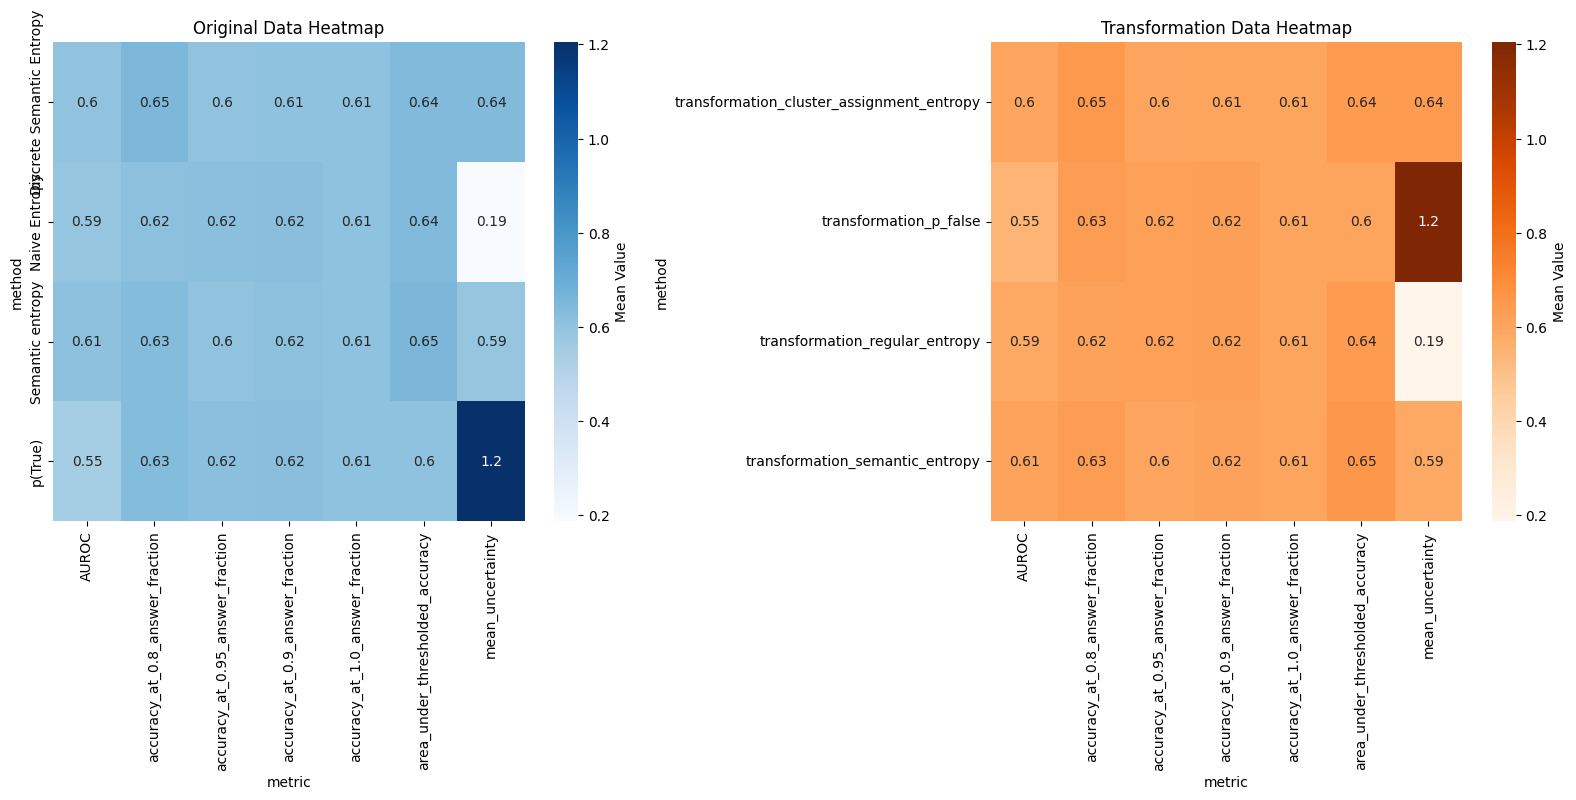

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 转换数据为透视表
original_pivot = original_data.pivot(index='method', columns='metric', values='means')
transformation_pivot = transformation_data.pivot(index='method', columns='metric', values='means')

# 创建热力图
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(original_pivot, annot=True, cmap='Blues', ax=axs[0], cbar_kws={'label': 'Mean Value'})
sns.heatmap(transformation_pivot, annot=True, cmap='Oranges', ax=axs[1], cbar_kws={'label': 'Mean Value'})

# 添加标题
axs[0].set_title('Original Data Heatmap')
axs[1].set_title('Transformation Data Heatmap')

plt.tight_layout()
plt.show()